In [1]:
cd G:\dd-resource\slides\homework\ML\HW1

G:\dd-resource\slides\homework\ML\HW1


# This is an implemetation of gradient_descent with Huber Loss.

In [2]:
import numpy as np
import pylab

In [3]:
def huber_loss(x,d):
    x=np.abs(x)
    return (x<=d)*x**2/2+(x>d)*d*(x-d/2.0)

In [4]:
def gradient_descent2(alpha, x, y, d,accurancy, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0]  # number of samples

    # initial theta
    # np.random.seed(1)
    t0 = np.random.random()
    t1 = np.random.random()

    # total error, J(theta)
    # J = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])
    J = sum([huber_loss((t0 + t1 * x[i] - y[i]), d) for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        # grad0 = 1.0 / m * sum([(t0 + t1 * x[i] - y[i]) for i in range(m)])
        # grad1 = 1.0 / m * sum([(t0 + t1 * x[i] - y[i]) * x[i] for i in range(m)])
        grad0=0
        for i in range(m):
            uni_err=t0 + t1 * x[i] - y[i]
            if(np.abs(uni_err)<=d):
                grad0=grad0+ uni_err/2
            elif(uni_err>d):
                grad0=grad0+d/2
            elif(uni_err<-d):
                grad0=grad0-d/2
        grad0=grad0/m

        grad1 = 0

        for i in range(m):
            uni_err = t0 + t1 * x[i] - y[i]
            if (np.abs(uni_err) <= d):
                grad1 = grad1 + uni_err * x[i] / 2
            elif (uni_err > d):
                grad1 = grad1 + d * x[i] / 2
            elif (uni_err < -d):
                grad1 = grad1 - d * x[i] / 2

        grad1 = grad1 / m

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1

        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        #e = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])
        e = sum([huber_loss((t0 + t1 * x[i] - y[i]), d) for i in range(m)])

        if abs(J - e) <= accurancy:
            print("Converged, iterations: ", iter, "!!!")
            converged = True

        J = e  # update error
        iter += 1  # update iter

        if iter == max_iter:
            print("Max interactions exceeded!")
            converged = True

    return t0, t1, J

In [5]:
def gradient_descent1(alpha, x, y, accurancy, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0]  # number of samples

    # initial theta
    # np.random.seed(1)
    t0 = np.random.random()
    t1 = np.random.random()

    # total error, J(theta)

    J = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])
    # J = sum([huber_loss((t0 + t1 * x[i] - y[i]),d) for i in range (m)])
    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0 / m * sum([(t0 + t1 * x[i] - y[i]) for i in range(m)])
        grad1 = 1.0 / m * sum([(t0 + t1 * x[i] - y[i]) * x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1

        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])
        # e = sum([huber_loss((t0 + t1 * x[i] - y[i]), d)for i in range(m)] )

        if abs(J - e) <= accurancy:
            print("Converged, iterations: ", iter, "!!!")
            converged = True

        J = e  # update error
        iter += 1  # update iter

        if iter == max_iter:
            print("Max interactions exceeded!")
            converged = True

    return t0, t1, J

In [6]:
def test_best_d_value():
    edges,x_points, y_points = read_file(1)
    alpha = 0.01  # learning rate
    accurancy = 1e-10  # convergence criteria
    for d in (0.2,0.3,0.4,0.5,0.7,1,3,5):
        best_theta0_d, best_theta1_d, error_d = gradient_descent2(alpha, x_points, y_points, d, accurancy,
                                                                 max_iter=10000)
        pylab.plot(d, error_d,'o-',color='green')
    pylab.show()

In [7]:
def read_file(num):
    def read_data(edge):
        x, y = edge.split()
        return int(x) / 10, int(y) / 100


    if(num==1):
        f = open("5-trainingdata.txt")
    else:
        f = open("5-testdata.txt")
    string = f.readline()
    x_points = []
    y_points = []
    if(num==1):
        edges = [read_data(f.readline()) for _ in range(32)]
    else:
        edges = [read_data(f.readline()) for _ in range(6)]
    for x, y in edges:
        x_points.append(x)
        y_points.append(y)
    f.close()
    return edges,np.array(x_points), np.asarray(y_points)

Converged, iterations:  6935 !!!
this theta0 is:  4.90627079504 and this theta1 is:  -0.134975822973 and this error is:  34.5656467306
Max interactions exceeded!
better theta0 is:  5.31575448533 and better theta1 is:  -0.219398743092 and better error is:  6.87174522796
linear square error is:  1.75992346086
huber error is:  0.871712651868
Have done!!!


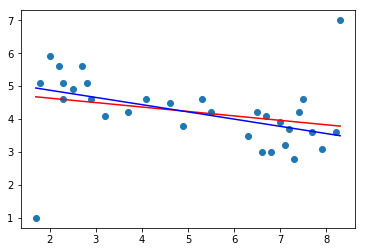

In [8]:
if __name__ == '__main__':
    edges,x_points, y_points = read_file(1)
    alpha = 0.01  # learning rate
    accurancy = 1e-10  # convergence criteria
    d=0.5

    theta0, theta1, this_error = gradient_descent1(alpha, x_points, y_points, accurancy, max_iter=10000)
    print("this theta0 is: ", theta0, "and this theta1 is: ", theta1, "and this error is: ", this_error)
    best_theta0, best_theta1, best_error = gradient_descent2(alpha, x_points, y_points, d, accurancy, max_iter=10000)
    print("better theta0 is: ", best_theta0, "and better theta1 is: ", best_theta1, "and better error is: ", best_error)


    for i in range(x_points.shape[0]):
        y_predict1 = theta0 + theta1 * x_points

    for i in range(x_points.shape[0]):
        y_predict2= best_theta0 + best_theta1 * x_points



    test_edges, test_x_points, test_y_points = read_file(0)
    test_m = test_x_points.shape[0]
    test_error1 = sum([(theta0 + theta1 * test_x_points[i] - test_y_points[i]) ** 2 for i in range(test_m)])
    # test_error2 = sum([ huber_loss((best_theta0 + best_theta1 * test_x_points[i] - test_y_points[i]), d) for i in range(test_m)])
    test_error2 = sum([(best_theta0 + best_theta1 * test_x_points[i] - test_y_points[i]) ** 2 for i in range(test_m)])
    print("linear square error is: ", test_error1)
    print("huber error is: ", test_error2)
    print("Have done!!!")

    pylab.plot(x_points, y_points, 'o')
    pylab.plot(x_points, y_predict1, 'k-', color='red')
    pylab.plot(x_points, y_predict2, 'k-', color='blue')
    pylab.show()